In [1]:
!pip install -q transformers datasets torch accelerate matplotlib nltk scikit-learn numpy


[notice] A new release of pip is available: 23.3.1 -> 24.1.2
[notice] To update, run: python -m pip install --upgrade pip


In [2]:
selected_layers = [
    'gpt_neox.embed_in.weight', 
    'gpt_neox.layers.0.input_layernorm.weight', 
    'gpt_neox.layers.0.post_attention_layernorm.weight', 
    'gpt_neox.layers.0.attention.query_key_value.weight', 
    'gpt_neox.layers.0.attention.dense.weight', 
    'gpt_neox.layers.0.mlp.dense_h_to_4h.weight', 
    'gpt_neox.layers.0.mlp.dense_4h_to_h.weight', 
    'gpt_neox.layers.1.input_layernorm.weight', 
    'gpt_neox.layers.1.post_attention_layernorm.weight', 
    'gpt_neox.layers.1.attention.query_key_value.weight', 
    'gpt_neox.layers.1.attention.dense.weight', 
    'gpt_neox.layers.1.mlp.dense_h_to_4h.weight', 
    'gpt_neox.layers.1.mlp.dense_4h_to_h.weight', 
    'gpt_neox.layers.2.input_layernorm.weight', 
    'gpt_neox.layers.2.post_attention_layernorm.weight', 
    'gpt_neox.layers.2.attention.query_key_value.weight', 
    'gpt_neox.layers.2.attention.dense.weight', 
    'gpt_neox.layers.2.mlp.dense_h_to_4h.weight', 
    'gpt_neox.layers.2.mlp.dense_4h_to_h.weight', 
    'gpt_neox.layers.3.input_layernorm.weight', 
    'gpt_neox.layers.3.post_attention_layernorm.weight', 
    'gpt_neox.layers.3.attention.query_key_value.weight', 
    'gpt_neox.layers.3.attention.dense.weight', 
    'gpt_neox.layers.3.mlp.dense_h_to_4h.weight', 
    'gpt_neox.layers.3.mlp.dense_4h_to_h.weight', 
    'gpt_neox.layers.4.input_layernorm.weight', 
    'gpt_neox.layers.4.post_attention_layernorm.weight', 
    'gpt_neox.layers.4.attention.query_key_value.weight', 
    'gpt_neox.layers.4.attention.dense.weight', 
    'gpt_neox.layers.4.mlp.dense_h_to_4h.weight', 
    'gpt_neox.layers.4.mlp.dense_4h_to_h.weight', 
    'gpt_neox.layers.5.input_layernorm.weight', 
    'gpt_neox.layers.5.post_attention_layernorm.weight', 
    'gpt_neox.layers.5.attention.query_key_value.weight', 
    'gpt_neox.layers.5.attention.dense.weight', 
    'gpt_neox.layers.5.mlp.dense_h_to_4h.weight', 
    'gpt_neox.layers.5.mlp.dense_4h_to_h.weight', 
    'gpt_neox.layers.6.input_layernorm.weight', 
    'gpt_neox.layers.6.post_attention_layernorm.weight', 
    'gpt_neox.layers.6.attention.query_key_value.weight', 
    'gpt_neox.layers.6.attention.dense.weight', 
    'gpt_neox.layers.6.mlp.dense_h_to_4h.weight', 
    'gpt_neox.layers.6.mlp.dense_4h_to_h.weight', 
    'gpt_neox.layers.7.input_layernorm.weight', 
    'gpt_neox.layers.7.post_attention_layernorm.weight', 
    'gpt_neox.layers.7.attention.query_key_value.weight', 
    'gpt_neox.layers.7.attention.dense.weight', 
    'gpt_neox.layers.7.mlp.dense_h_to_4h.weight', 
    'gpt_neox.layers.7.mlp.dense_4h_to_h.weight', 
    'gpt_neox.layers.8.input_layernorm.weight', 
    'gpt_neox.layers.8.post_attention_layernorm.weight', 
    'gpt_neox.layers.8.attention.query_key_value.weight', 
    'gpt_neox.layers.8.attention.dense.weight', 
    'gpt_neox.layers.8.mlp.dense_h_to_4h.weight', 
    'gpt_neox.layers.8.mlp.dense_4h_to_h.weight', 
    'gpt_neox.layers.9.input_layernorm.weight', 
    'gpt_neox.layers.9.post_attention_layernorm.weight', 
    'gpt_neox.layers.9.attention.query_key_value.weight', 
    'gpt_neox.layers.9.attention.dense.weight', 
    'gpt_neox.layers.9.mlp.dense_h_to_4h.weight', 
    'gpt_neox.layers.9.mlp.dense_4h_to_h.weight', 
    'gpt_neox.layers.10.input_layernorm.weight', 
    'gpt_neox.layers.10.post_attention_layernorm.weight', 
    'gpt_neox.layers.10.attention.query_key_value.weight', 
    'gpt_neox.layers.10.attention.dense.weight', 
    'gpt_neox.layers.10.mlp.dense_h_to_4h.weight', 
    'gpt_neox.layers.10.mlp.dense_4h_to_h.weight', 
    'gpt_neox.layers.11.input_layernorm.weight', 
    'gpt_neox.layers.11.post_attention_layernorm.weight', 
    'gpt_neox.layers.11.attention.query_key_value.weight', 
    'gpt_neox.layers.11.attention.dense.weight', 
    'gpt_neox.layers.11.mlp.dense_h_to_4h.weight', 
    'gpt_neox.layers.11.mlp.dense_4h_to_h.weight', 
    'gpt_neox.layers.12.input_layernorm.weight', 
    'gpt_neox.layers.12.post_attention_layernorm.weight', 
    'gpt_neox.layers.12.attention.query_key_value.weight', 
    'gpt_neox.layers.12.attention.dense.weight', 
    'gpt_neox.layers.12.mlp.dense_h_to_4h.weight', 
    'gpt_neox.layers.12.mlp.dense_4h_to_h.weight', 
    'gpt_neox.layers.13.input_layernorm.weight', 
    'gpt_neox.layers.13.post_attention_layernorm.weight', 
    'gpt_neox.layers.13.attention.query_key_value.weight', 
    'gpt_neox.layers.13.attention.dense.weight', 
    'gpt_neox.layers.13.mlp.dense_h_to_4h.weight', 
    'gpt_neox.layers.13.mlp.dense_4h_to_h.weight', 
    'gpt_neox.layers.14.input_layernorm.weight', 
    'gpt_neox.layers.14.post_attention_layernorm.weight', 
    'gpt_neox.layers.14.attention.query_key_value.weight', 
    'gpt_neox.layers.14.attention.dense.weight', 
    'gpt_neox.layers.14.mlp.dense_h_to_4h.weight', 
    'gpt_neox.layers.14.mlp.dense_4h_to_h.weight', 
    'gpt_neox.layers.15.input_layernorm.weight', 
    'gpt_neox.layers.15.post_attention_layernorm.weight', 
    'gpt_neox.layers.15.attention.query_key_value.weight', 
    'gpt_neox.layers.15.attention.dense.weight', 
    'gpt_neox.layers.15.mlp.dense_h_to_4h.weight', 
    'gpt_neox.layers.15.mlp.dense_4h_to_h.weight', 
    'gpt_neox.layers.16.input_layernorm.weight', 
    'gpt_neox.layers.16.post_attention_layernorm.weight', 
    'gpt_neox.layers.16.attention.query_key_value.weight', 
    'gpt_neox.layers.16.attention.dense.weight', 
    'gpt_neox.layers.16.mlp.dense_h_to_4h.weight', 
    'gpt_neox.layers.16.mlp.dense_4h_to_h.weight', 
    'gpt_neox.layers.17.input_layernorm.weight', 
    'gpt_neox.layers.17.post_attention_layernorm.weight', 
    'gpt_neox.layers.17.attention.query_key_value.weight', 
    'gpt_neox.layers.17.attention.dense.weight', 
    'gpt_neox.layers.17.mlp.dense_h_to_4h.weight', 
    'gpt_neox.layers.17.mlp.dense_4h_to_h.weight', 
    'gpt_neox.layers.18.input_layernorm.weight', 
    'gpt_neox.layers.18.post_attention_layernorm.weight', 
    'gpt_neox.layers.18.attention.query_key_value.weight', 
    'gpt_neox.layers.18.attention.dense.weight', 
    'gpt_neox.layers.18.mlp.dense_h_to_4h.weight', 
    'gpt_neox.layers.18.mlp.dense_4h_to_h.weight', 
    'gpt_neox.layers.19.input_layernorm.weight', 
    'gpt_neox.layers.19.post_attention_layernorm.weight', 
    'gpt_neox.layers.19.attention.query_key_value.weight', 
    'gpt_neox.layers.19.attention.dense.weight', 
    'gpt_neox.layers.19.mlp.dense_h_to_4h.weight', 
    'gpt_neox.layers.19.mlp.dense_4h_to_h.weight', 
    'gpt_neox.layers.20.input_layernorm.weight', 
    'gpt_neox.layers.20.post_attention_layernorm.weight', 
    'gpt_neox.layers.20.attention.query_key_value.weight', 
    'gpt_neox.layers.20.attention.dense.weight', 
    'gpt_neox.layers.20.mlp.dense_h_to_4h.weight', 
    'gpt_neox.layers.20.mlp.dense_4h_to_h.weight', 
    'gpt_neox.layers.21.input_layernorm.weight', 
    'gpt_neox.layers.21.post_attention_layernorm.weight', 
    'gpt_neox.layers.21.attention.query_key_value.weight', 
    'gpt_neox.layers.21.attention.dense.weight', 
    'gpt_neox.layers.21.mlp.dense_h_to_4h.weight', 
    'gpt_neox.layers.21.mlp.dense_4h_to_h.weight', 
    'gpt_neox.layers.22.input_layernorm.weight', 
    'gpt_neox.layers.22.post_attention_layernorm.weight', 
    'gpt_neox.layers.22.attention.query_key_value.weight', 
    'gpt_neox.layers.22.attention.dense.weight', 
    'gpt_neox.layers.22.mlp.dense_h_to_4h.weight', 
    'gpt_neox.layers.22.mlp.dense_4h_to_h.weight', 
    'gpt_neox.layers.23.input_layernorm.weight', 
    'gpt_neox.layers.23.post_attention_layernorm.weight', 
    'gpt_neox.layers.23.attention.query_key_value.weight', 
    'gpt_neox.layers.23.attention.dense.weight', 
    'gpt_neox.layers.23.mlp.dense_h_to_4h.weight', 
    'gpt_neox.layers.23.mlp.dense_4h_to_h.weight', 
    'gpt_neox.final_layer_norm.weight', 
    'embed_out.weight'
]


In [29]:
import os
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from transformers import GPTNeoXForCausalLM
import matplotlib.cm as cm



# Function to calculate MAD
def calculate_mad(weights1, weights2):
    return np.mean(np.abs(weights1 - weights2))

# Function to load models
def load_models(model_path):
    model_name = "EleutherAI/pythia-410m"
    model_pretrained = GPTNeoXForCausalLM.from_pretrained(model_name).to('cuda')
    model_overtrained = GPTNeoXForCausalLM.from_pretrained(model_name).to('cuda')
    model_overtrained.load_state_dict(torch.load(model_path))
    return model_pretrained, model_overtrained

# Function to rename loop folders
def rename_loop_folders(experiment_folder):
    for folder in os.listdir(experiment_folder):
        if folder.startswith("loop_"):
            loop_number = folder.replace("loop_", "")
            new_name = os.path.join(experiment_folder, loop_number)
            old_name = os.path.join(experiment_folder, folder)
            os.rename(old_name, new_name)

# Main function
def main(experiment_folder):
    selected_layers = ['layer1.weight', 'layer2.weight', 'layer3.weight']  # Example selected layers
    all_mad_values_path = os.path.join(output_folder, 'all_mad_values.csv')

    # Rename loop folders
    rename_loop_folders(experiment_folder)

    if os.path.exists(all_mad_values_path):
        df_all_mad_values = pd.read_csv(all_mad_values_path)
    else:
        all_mad_values = []
        average_mad_per_model_per_loop = []

        # Loop through all models in all loops
        loop_folders = sorted([d for d in os.listdir(experiment_folder) if os.path.isdir(os.path.join(experiment_folder, d))],
                              key=lambda x: int(x))
        
        for loop_folder in loop_folders:
            loop_path = os.path.join(experiment_folder, loop_folder)

            loop_mad_values = []
            
            for model_file in os.listdir(loop_path):
                if not model_file.endswith('.pth'):
                    continue

                model_path = os.path.join(loop_path, model_file)
                model_pretrained, model_overtrained = load_models(model_path)
                layer_names = [name for name, _ in model_pretrained.named_parameters() if "weight" in name]
                
                for layer_idx, layer_name in enumerate(layer_names):
                    weights_pretrained = model_pretrained.state_dict()[layer_name].cpu().numpy()
                    weights_overtrained = model_overtrained.state_dict()[layer_name].cpu().numpy()
                    mad = calculate_mad(weights_pretrained.flatten(), weights_overtrained.flatten())
                    all_mad_values.append({'Model': model_file, 'Loop': int(loop_folder), 'Layer': layer_idx, 'Layer_Name': layer_name, 'MAD': mad})
                    loop_mad_values.append(mad)

            if loop_mad_values:
                average_mad_per_model_per_loop.append({'Loop': int(loop_folder), 'Average MAD': np.mean(loop_mad_values)})

        # Save all MAD values to CSV
        df_all_mad_values = pd.DataFrame(all_mad_values)
        df_all_mad_values.to_csv(all_mad_values_path, index=False)

    # Average MAD per model per loop plot
    df_avg_mad_per_loop = df_all_mad_values.groupby('Loop')['MAD'].mean().reset_index().rename(columns={'MAD': 'Average MAD'})
    plt.figure(figsize=(10, 5))
    plt.plot(df_avg_mad_per_loop['Loop'], df_avg_mad_per_loop['Average MAD'], marker='o')
    plt.xlabel('Loop')
    plt.ylabel('Average MAD')
    plt.title('Average MAD per Model per Loop')
    plt.grid()
    plot_path_avg_mad_per_loop = os.path.join(output_folder, 'average_mad_per_model_per_loop.png')
    plt.savefig(plot_path_avg_mad_per_loop)
    plt.close()

    # Average MAD per layer weight plot
    avg_mad_per_layer = df_all_mad_values.groupby('Layer')['MAD'].mean().reset_index()
    plt.figure(figsize=(18, 6))
    plt.plot(avg_mad_per_layer['Layer'], avg_mad_per_layer['MAD'], marker='o', color='blue')
    plt.xlabel('Layer Index')
    plt.ylabel('Average MAD')
    plt.title('Average MAD per Layer Weight')
    plt.grid()
    plt.tight_layout()
    plot_path_avg_mad_per_layer = os.path.join(output_folder, 'average_mad_per_layer_weight.png')
    plt.savefig(plot_path_avg_mad_per_layer)
    plt.close()

    # Average MAD per layer weight per model plot
    plt.figure(figsize=(18, 6))
    loops_sorted = sorted(df_all_mad_values['Loop'].unique())
    colors = cm.viridis(np.linspace(0, 1, len(loops_sorted)))
    for i, loop in enumerate(loops_sorted):
        loop_data = df_all_mad_values[df_all_mad_values['Loop'] == loop]
        plt.scatter(loop_data['Layer'], loop_data['MAD'], alpha=0.6, label=f'Loop {loop}', color=colors[i])
    plt.xlabel('Layer Index')
    plt.ylabel('MAD')
    plt.title('Average MAD per Layer Weight per Model')
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plot_path_avg_mad_per_layer_per_model = os.path.join(output_folder, 'average_mad_per_layer_weight_per_model.png')
    plt.savefig(plot_path_avg_mad_per_layer_per_model)
    plt.close()

    # Difference change over time plot
    df_all_mad_values = df_all_mad_values.sort_values('Loop')
    mad_diff = df_all_mad_values.groupby(['Layer', 'Loop'])['MAD'].mean().unstack().diff(axis=1).fillna(0)
    mad_diff_cumulative = mad_diff.cumsum(axis=1)

    fig, ax = plt.subplots(figsize=(18, 6))
    layers_sorted = mad_diff_cumulative.index
    colors = cm.viridis(np.linspace(0, 1, len(layers_sorted)))
    for i, layer in enumerate(layers_sorted):
        ax.plot(mad_diff_cumulative.columns, mad_diff_cumulative.loc[layer], marker='o', color=colors[i], label=f'Layer {layer}')
    sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=0, vmax=len(layers_sorted)))
    sm.set_array([])
    cbar = fig.colorbar(sm, ax=ax, ticks=np.linspace(0, len(layers_sorted)-1, len(layers_sorted)))
    cbar.set_label('Layer Index')
    plt.xlabel('Loop')
    plt.ylabel('Cumulative MAD Change')
    plt.title('Cumulative MAD Change over Loops for Each Layer')
    plt.grid()
    plt.tight_layout()
    plot_path_diff_over_time = os.path.join(output_folder, 'cumulative_mad_change_over_time.png')
    plt.savefig(plot_path_diff_over_time)
    plt.close()

if __name__ == "__main__":
    experiment = "1_50_medium_learning"
    experiment_folder = f"/workspace/slice-monorepo/sub_validations/HT_LR_predictor_studier/{experiment}"
    output_folder = f'layer_analysis_{experiment}'
    os.makedirs(output_folder, exist_ok=True)
    main(experiment_folder)


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Pre-trained model:
Layer: gpt_neox.layers.0.attention.query_key_value.weight, Weight stats - mean: -4.658636953536188e-06, std: 0.02697836607694626


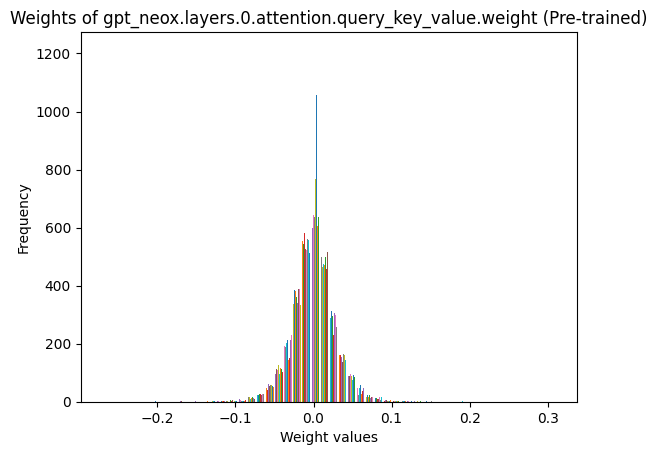

Layer: gpt_neox.layers.0.attention.dense.weight, Weight stats - mean: 3.060660219489364e-06, std: 0.016590125858783722


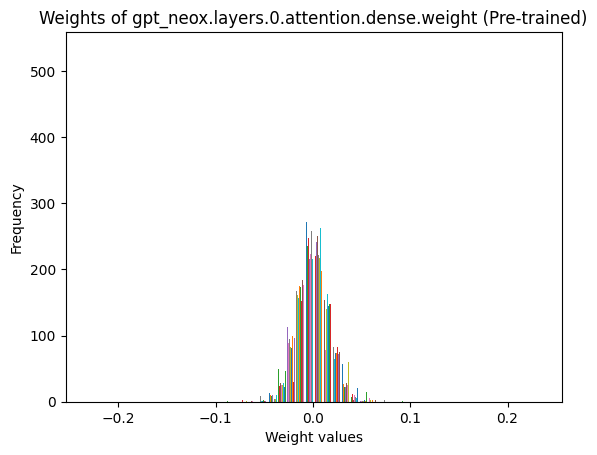

Layer: gpt_neox.layers.1.attention.query_key_value.weight, Weight stats - mean: -6.0959923757764045e-06, std: 0.027517933398485184


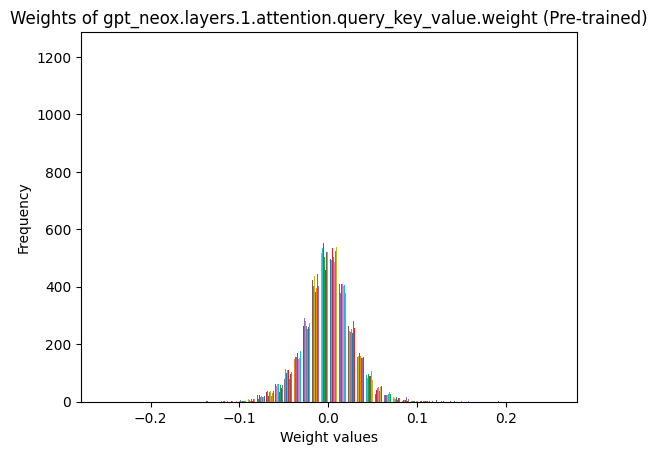

Layer: gpt_neox.layers.1.attention.dense.weight, Weight stats - mean: 2.233359964520787e-06, std: 0.01667718216776848


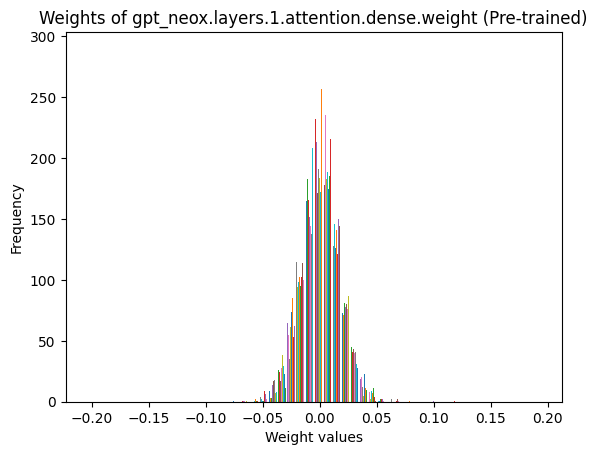

Layer: gpt_neox.layers.2.attention.query_key_value.weight, Weight stats - mean: 5.2043046707694884e-06, std: 0.02646738849580288


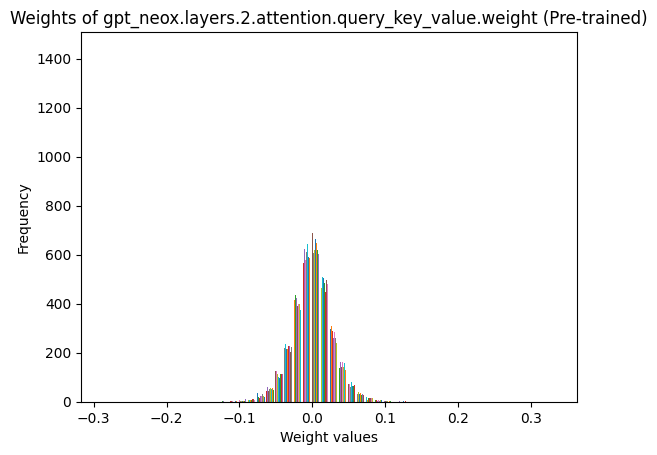

Layer: gpt_neox.layers.2.attention.dense.weight, Weight stats - mean: 5.787690042780014e-07, std: 0.016670316457748413


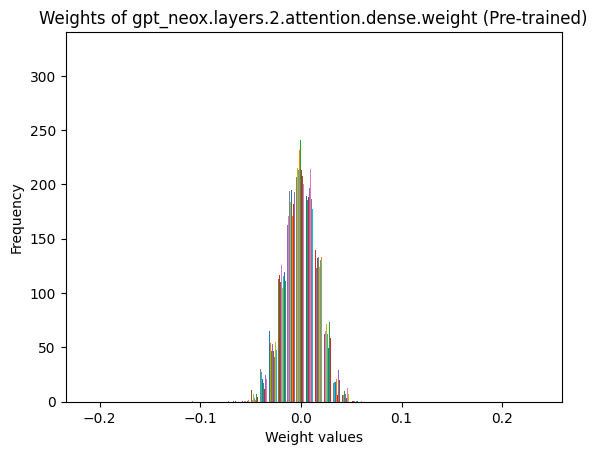

Overtrained model loaded:
Layer: gpt_neox.layers.0.attention.query_key_value.weight, Weight stats - mean: -3.5975153878098354e-06, std: 0.027279235422611237


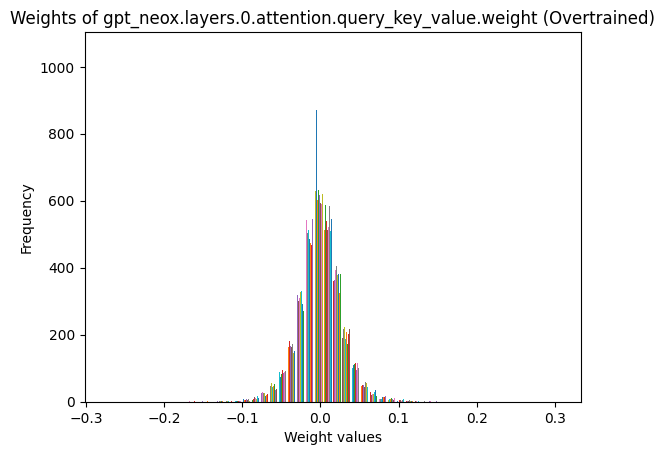

Layer: gpt_neox.layers.0.attention.dense.weight, Weight stats - mean: 2.0116290215810295e-06, std: 0.01707836240530014


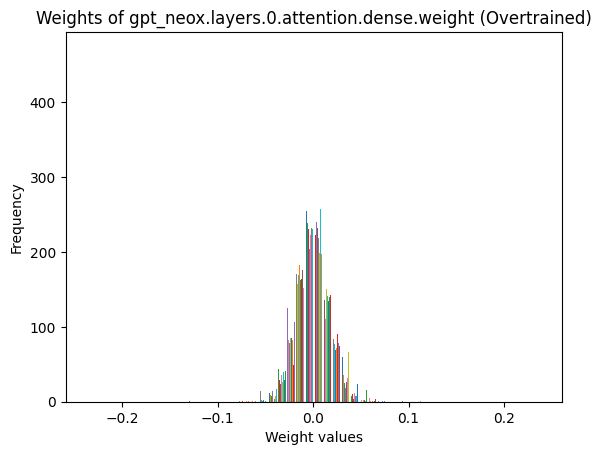

Layer: gpt_neox.layers.1.attention.query_key_value.weight, Weight stats - mean: -7.514960088883527e-06, std: 0.027821294963359833


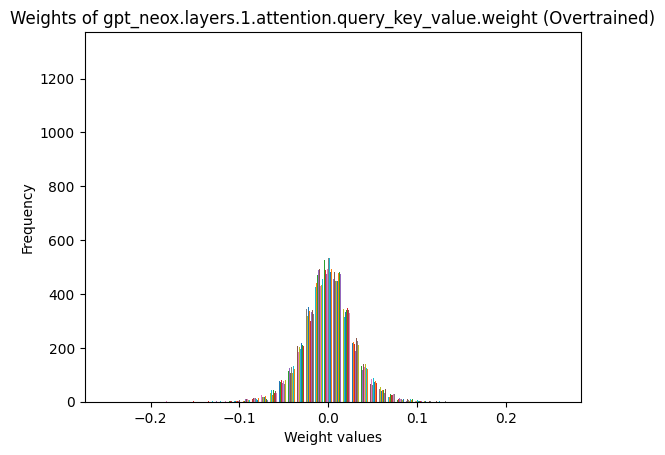

Layer: gpt_neox.layers.1.attention.dense.weight, Weight stats - mean: 1.578519913891796e-06, std: 0.017173731699585915


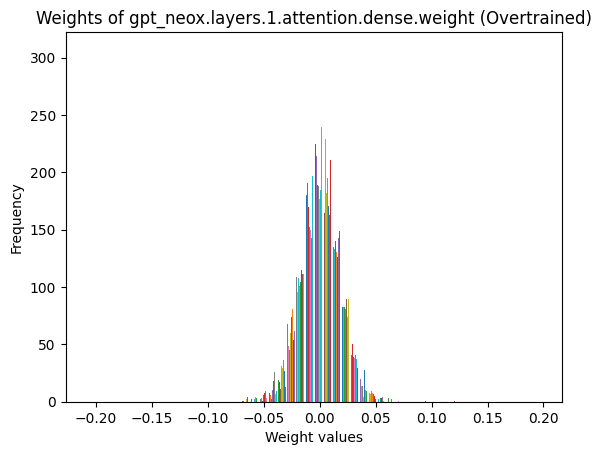

Layer: gpt_neox.layers.2.attention.query_key_value.weight, Weight stats - mean: 4.369010639493354e-06, std: 0.02677125111222267


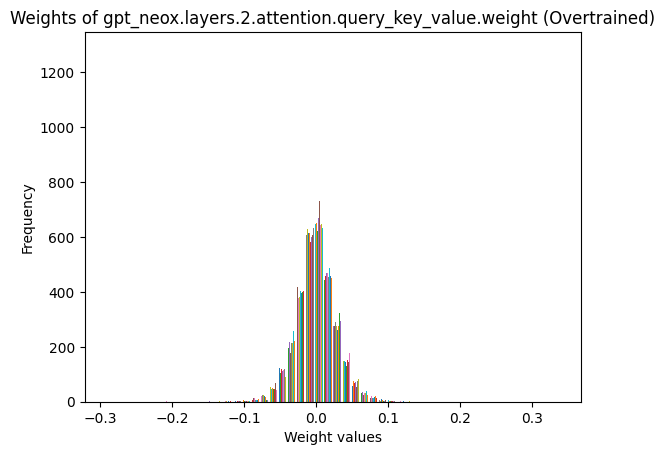

Layer: gpt_neox.layers.2.attention.dense.weight, Weight stats - mean: -4.131328523726552e-07, std: 0.01715730130672455


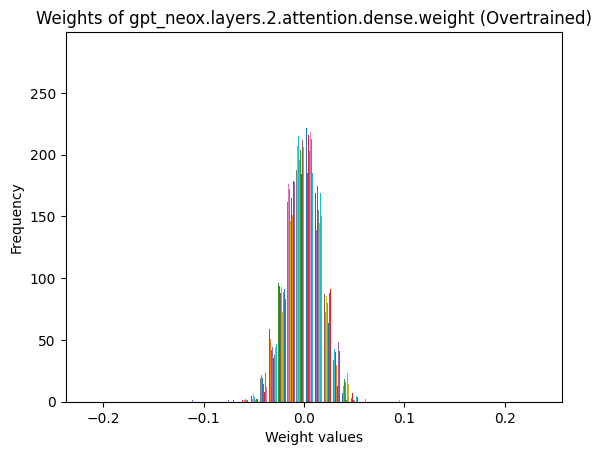

Analyzing differences between pre-trained model and overtrained model:
Layer: gpt_neox.layers.0.attention.query_key_value.weight, Mean diff: 1.0611214520395151e-06, Std diff: 0.0040634749457240105
Layer: gpt_neox.layers.0.attention.dense.weight, Mean diff: -1.0490315389688476e-06, Std diff: 0.004089312627911568
Layer: gpt_neox.layers.1.attention.query_key_value.weight, Mean diff: -1.4189636203809641e-06, Std diff: 0.004073119722306728
Layer: gpt_neox.layers.1.attention.dense.weight, Mean diff: -6.548426085828396e-07, Std diff: 0.004086765460669994
Layer: gpt_neox.layers.2.attention.query_key_value.weight, Mean diff: -8.3529477024058e-07, Std diff: 0.004059063270688057
Layer: gpt_neox.layers.2.attention.dense.weight, Mean diff: -9.9189719549031e-07, Std diff: 0.004081336315721273
Detailed Analysis of Layer Differences:

Layer: gpt_neox.layers.0.attention.query_key_value.weight
Mean difference: 1.0611214520395151e-06
Standard deviation of difference: 0.0040634749457240105
Minimum differe

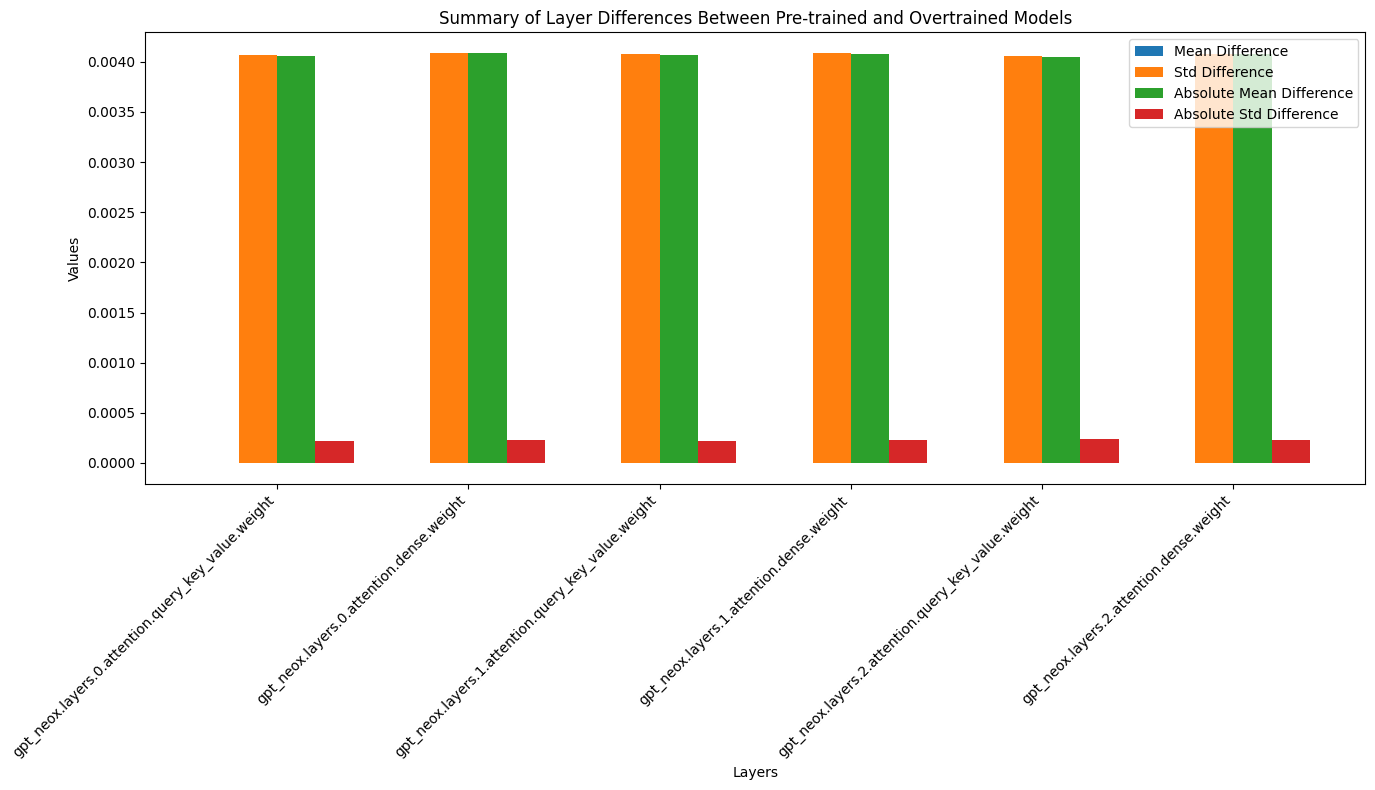

In [3]:
import os
import torch
import numpy as np
from transformers import GPTNeoXForCausalLM, AutoTokenizer
import matplotlib.pyplot as plt

# Ensure tokenizer parallelism is disabled
os.environ["TOKENIZERS_PARALLELISM"] = "false"

# Function to plot the weights
def plot_weights(weights, title):
    plt.hist(weights, bins=50)
    plt.title(title)
    plt.xlabel('Weight values')
    plt.ylabel('Frequency')
    plt.show()

# Function to print and plot weights of specific layers
def inspect_layers(model, layer_names, title_suffix=""):
    for name, param in model.named_parameters():
        if name in layer_names:
            weights = param.data.cpu().numpy()
            print(f"Layer: {name}, Weight stats - mean: {weights.mean()}, std: {weights.std()}")
            plot_weights(weights, f'Weights of {name} {title_suffix}')

# Define the model and tokenizer
model_name = "EleutherAI/pythia-410m"
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Set the pad token to be the same as the eos token
if tokenizer.pad_token is None:
    tokenizer.pad_token = tokenizer.eos_token

# Load and inspect the pre-trained model
model_pretrained = GPTNeoXForCausalLM.from_pretrained(model_name).to('cuda')
layer_names = [
    'gpt_neox.layers.0.attention.query_key_value.weight', 
    'gpt_neox.layers.0.attention.dense.weight',
    'gpt_neox.layers.1.attention.query_key_value.weight',
    'gpt_neox.layers.1.attention.dense.weight',
    'gpt_neox.layers.2.attention.query_key_value.weight',
    'gpt_neox.layers.2.attention.dense.weight'
]
print("Pre-trained model:")
inspect_layers(model_pretrained, layer_names, title_suffix="(Pre-trained)")

# Load weights of the saved model and inspect layers
model_overtrained = GPTNeoXForCausalLM.from_pretrained(model_name).to('cuda')
saved_model_path = "/workspace/slice-monorepo/sub_validations/HT_LR_predictor_studier/50_100_high_learning/loop_25/pythia-410m_lr1e-06_epochs2.pth"
model_overtrained.load_state_dict(torch.load(saved_model_path))
print("Overtrained model loaded:")
inspect_layers(model_overtrained, layer_names, title_suffix="(Overtrained)")

# Analysis of differences
def analyze_layer_differences(model1, model2, layer_names):
    differences = {}
    for name in layer_names:
        weights1 = model1.state_dict()[name].cpu().numpy()
        weights2 = model2.state_dict()[name].cpu().numpy()
        diff = weights2 - weights1
        differences[name] = {
            'mean_diff': np.mean(diff),
            'std_diff': np.std(diff),
            'min_diff': np.min(diff),
            'max_diff': np.max(diff),
            'abs_mean_diff': np.mean(np.abs(diff)),
            'abs_std_diff': np.std(np.abs(diff)),
            'abs_min_diff': np.min(np.abs(diff)),
            'abs_max_diff': np.max(np.abs(diff)),
        }
        print(f"Layer: {name}, Mean diff: {differences[name]['mean_diff']}, Std diff: {differences[name]['std_diff']}")
    return differences

# Perform analysis
print("Analyzing differences between pre-trained model and overtrained model:")
differences = analyze_layer_differences(model_pretrained, model_overtrained, layer_names)

# Detailed analysis
def detailed_analysis(differences):
    analysis = "Detailed Analysis of Layer Differences:\n"
    for name, stats in differences.items():
        analysis += (f"\nLayer: {name}\n"
                     f"Mean difference: {stats['mean_diff']}\n"
                     f"Standard deviation of difference: {stats['std_diff']}\n"
                     f"Minimum difference: {stats['min_diff']}\n"
                     f"Maximum difference: {stats['max_diff']}\n"
                     f"Absolute mean difference: {stats['abs_mean_diff']}\n"
                     f"Absolute standard deviation of difference: {stats['abs_std_diff']}\n"
                     f"Absolute minimum difference: {stats['abs_min_diff']}\n"
                     f"Absolute maximum difference: {stats['abs_max_diff']}\n")
    return analysis

# Print detailed analysis
analysis_report = detailed_analysis(differences)
print(analysis_report)

# Summarizing visualization
def summarize_differences(differences):
    layer_names = list(differences.keys())
    mean_diffs = [differences[name]['mean_diff'] for name in layer_names]
    std_diffs = [differences[name]['std_diff'] for name in layer_names]
    abs_mean_diffs = [differences[name]['abs_mean_diff'] for name in layer_names]
    abs_std_diffs = [differences[name]['abs_std_diff'] for name in layer_names]

    x = np.arange(len(layer_names))

    fig, ax = plt.subplots(figsize=(14, 8))
    
    ax.bar(x - 0.3, mean_diffs, width=0.2, label='Mean Difference')
    ax.bar(x - 0.1, std_diffs, width=0.2, label='Std Difference')
    ax.bar(x + 0.1, abs_mean_diffs, width=0.2, label='Absolute Mean Difference')
    ax.bar(x + 0.3, abs_std_diffs, width=0.2, label='Absolute Std Difference')

    ax.set_xlabel('Layers')
    ax.set_ylabel('Values')
    ax.set_title('Summary of Layer Differences Between Pre-trained and Overtrained Models')
    ax.set_xticks(x)
    ax.set_xticklabels(layer_names, rotation=45, ha='right')
    ax.legend()

    plt.tight_layout()
    plt.show()

summarize_differences(differences)


In [6]:
!pip install -q umap-learn seaborn scikit-learn

  Preparing metadata (setup.py) ... done
  Created wheel for umap: filename=umap-0.1.1-py3-none-any.whl size=3543 sha256=51743989ebd1c1a7d332ad8a694c8f07becbfa37d2ae1990de0eff88cc3a0a2b
  Stored in directory: /root/.cache/pip/wheels/15/f1/28/53dcf7a309118ed35d810a5f9cb995217800f3f269ab5771cb
Successfully built umap

[notice] A new release of pip is available: 23.3.1 -> 24.1.2
[notice] To update, run: python -m pip install --upgrade pip


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Available layers: ['gpt_neox.embed_in.weight', 'gpt_neox.layers.0.input_layernorm.weight', 'gpt_neox.layers.0.post_attention_layernorm.weight', 'gpt_neox.layers.0.attention.query_key_value.weight', 'gpt_neox.layers.0.attention.dense.weight', 'gpt_neox.layers.0.mlp.dense_h_to_4h.weight', 'gpt_neox.layers.0.mlp.dense_4h_to_h.weight', 'gpt_neox.layers.1.input_layernorm.weight', 'gpt_neox.layers.1.post_attention_layernorm.weight', 'gpt_neox.layers.1.attention.query_key_value.weight', 'gpt_neox.layers.1.attention.dense.weight', 'gpt_neox.layers.1.mlp.dense_h_to_4h.weight', 'gpt_neox.layers.1.mlp.dense_4h_to_h.weight', 'gpt_neox.layers.2.input_layernorm.weight', 'gpt_neox.layers.2.post_attention_layernorm.weight', 'gpt_neox.layers.2.attention.query_key_value.weight', 'gpt_neox.layers.2.attention.dense.weight', 'gpt_neox.layers.2.mlp.dense_h_to_4h.weight', 'gpt_neox.layers.2.mlp.dense_4h_to_h.weight', 'gpt_neox.layers.3.input_layernorm.weight', 'gpt_neox.layers.3.post_attention_layernorm.weig

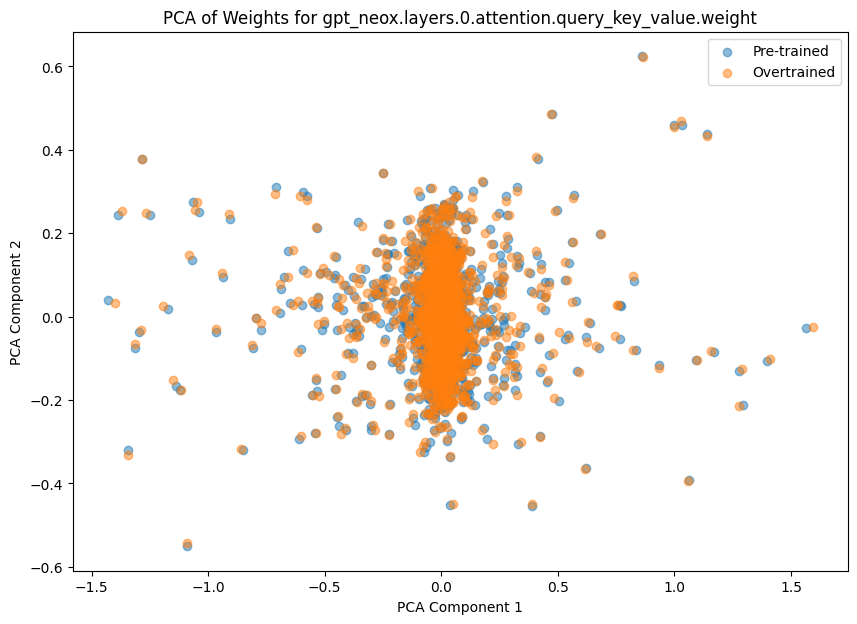

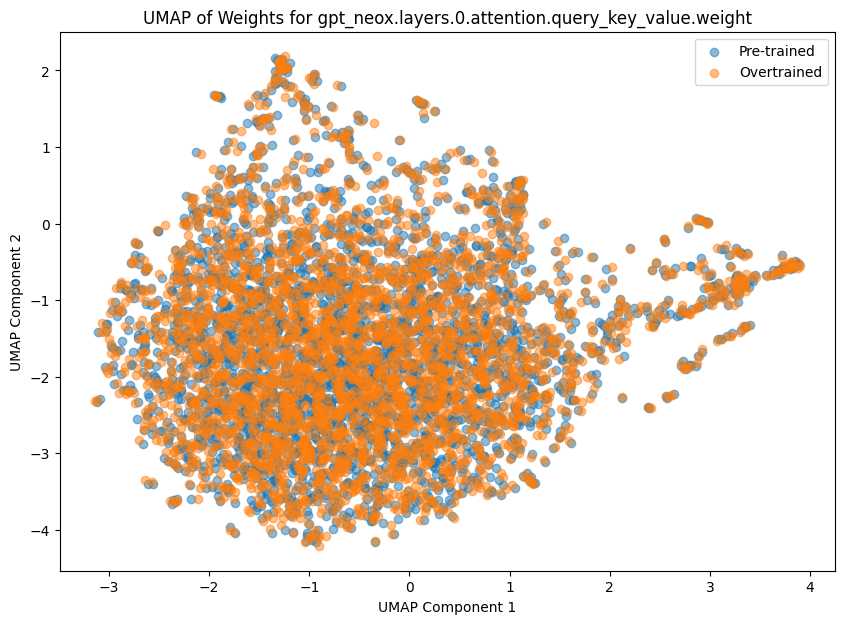

Performing PCA and UMAP on layer: gpt_neox.layers.0.attention.dense.weight


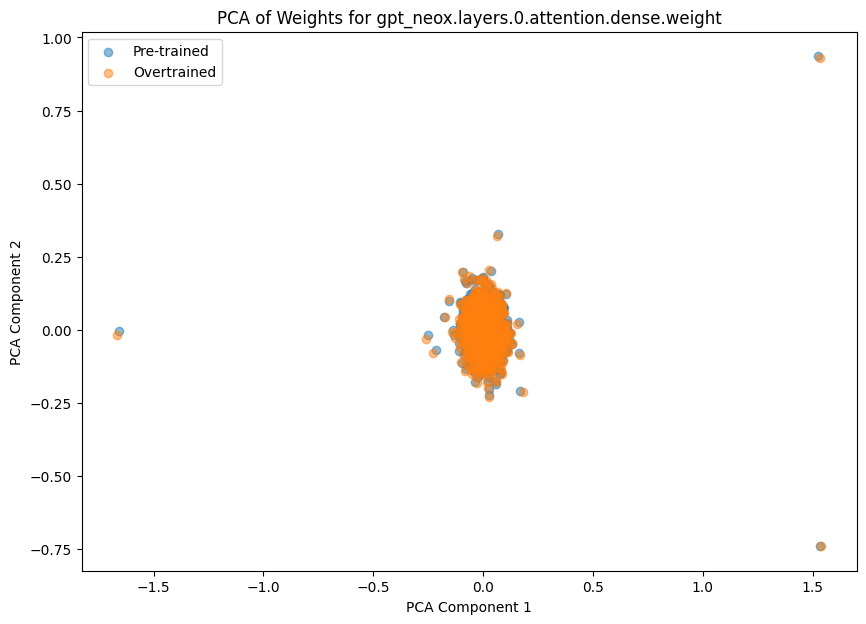

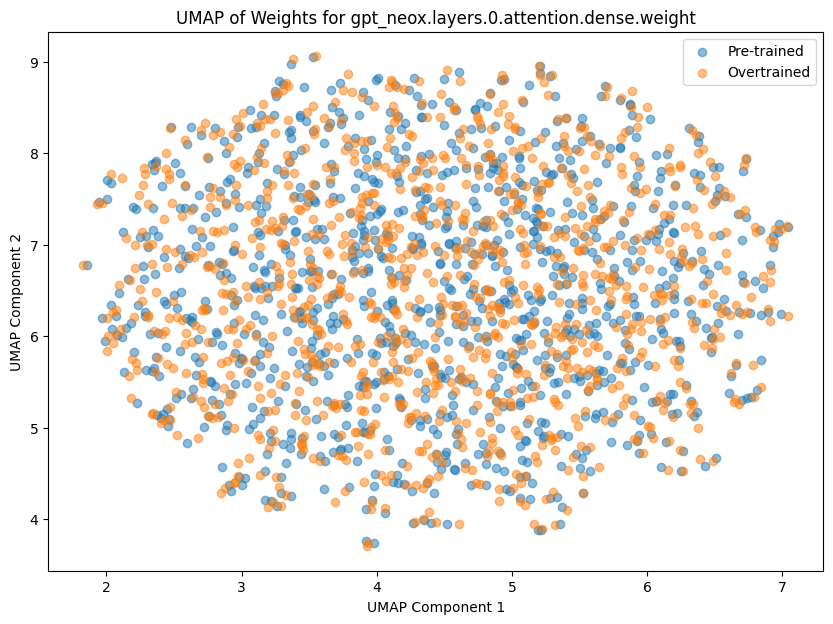

Performing PCA and UMAP on layer: gpt_neox.layers.1.attention.query_key_value.weight


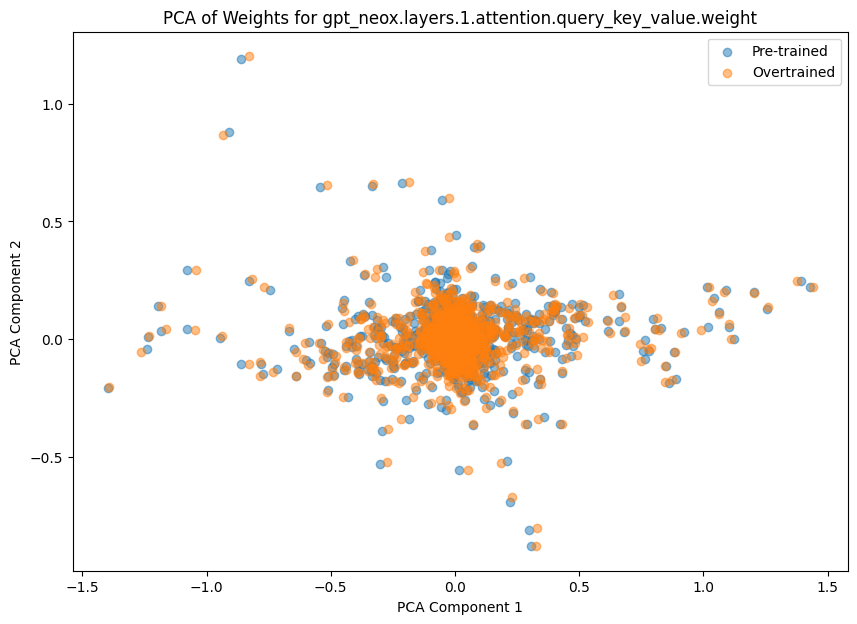

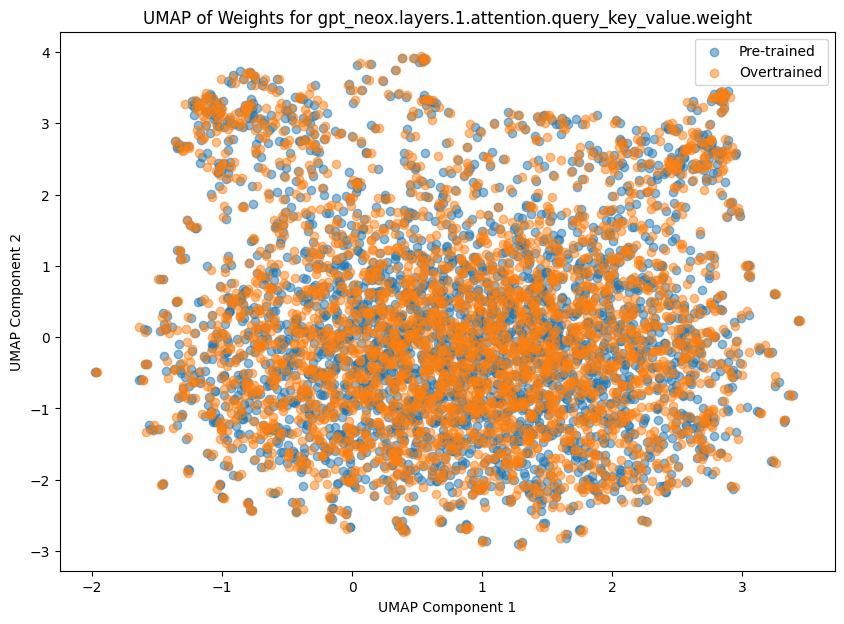

Performing PCA and UMAP on layer: gpt_neox.layers.1.attention.dense.weight


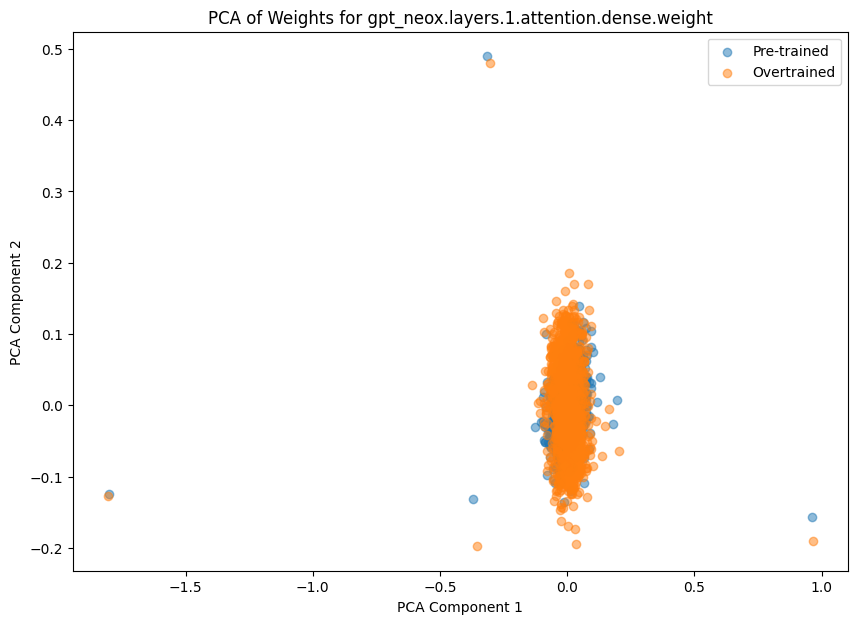

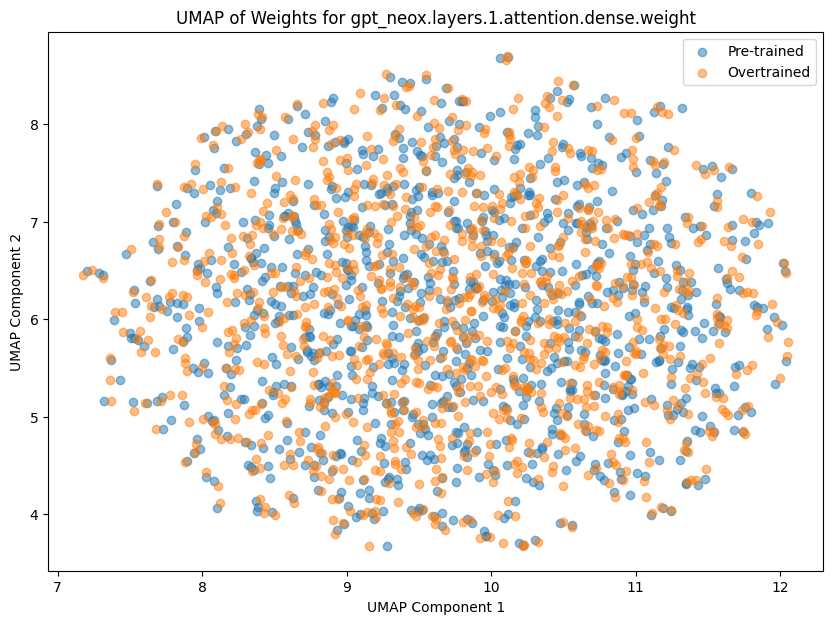

Performing PCA and UMAP on layer: gpt_neox.layers.11.attention.query_key_value.weight


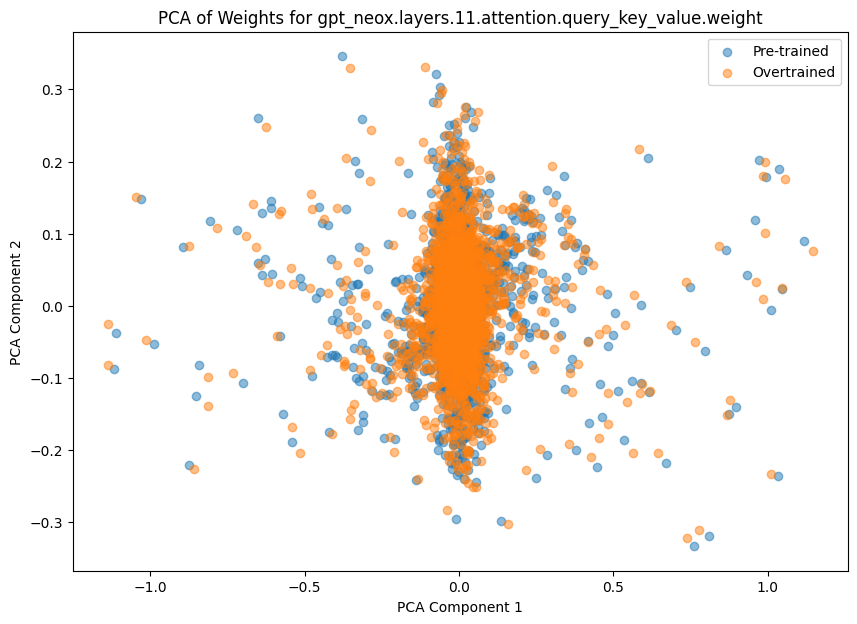

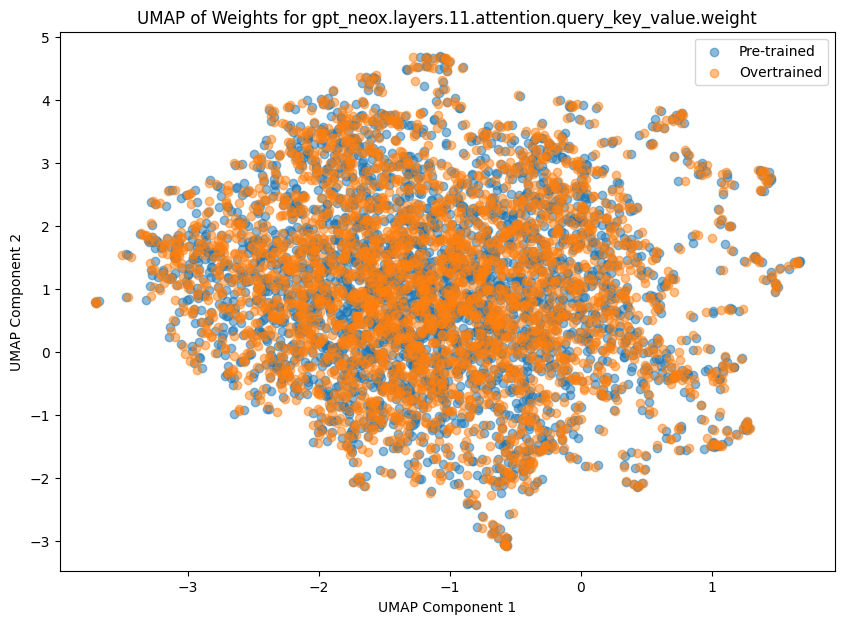

Performing PCA and UMAP on layer: gpt_neox.layers.11.attention.dense.weight


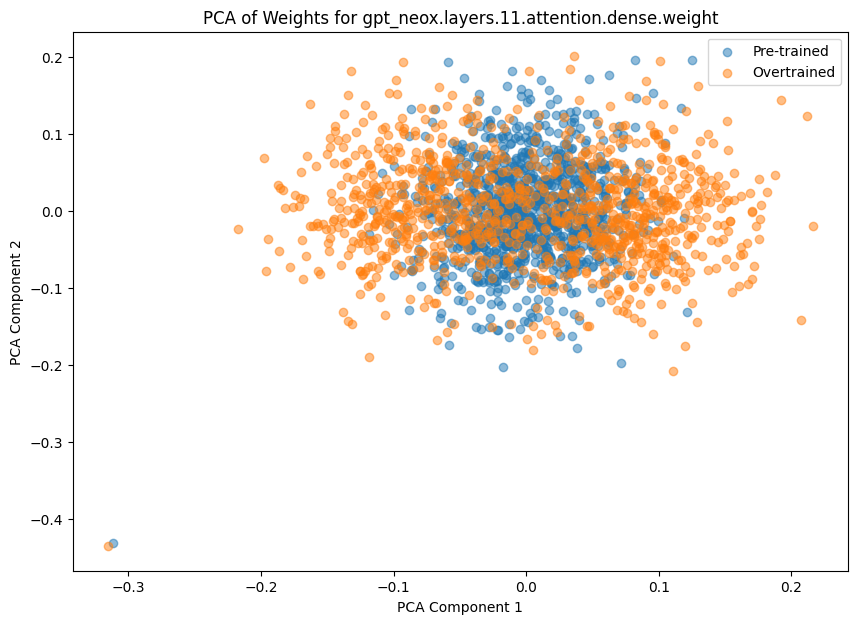

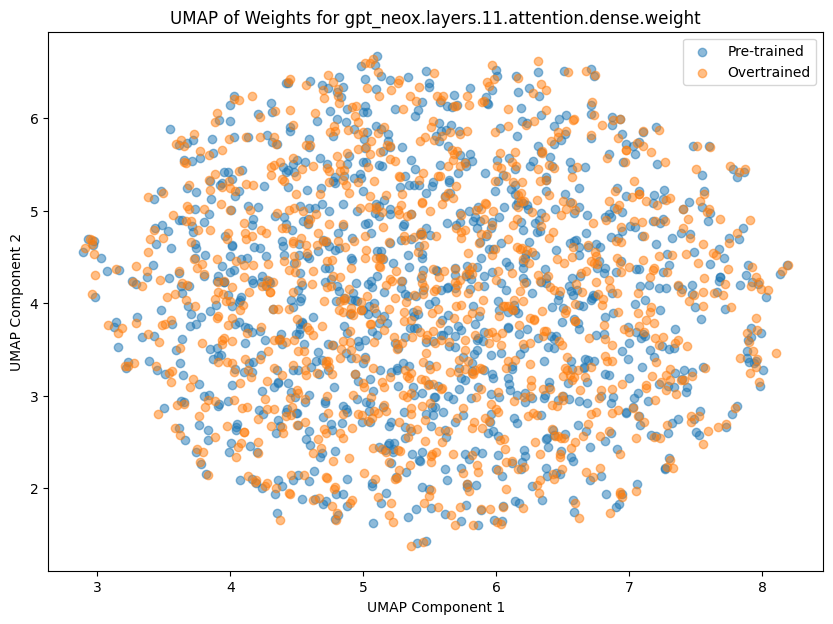

Performing PCA and UMAP on layer: gpt_neox.layers.22.attention.query_key_value.weight


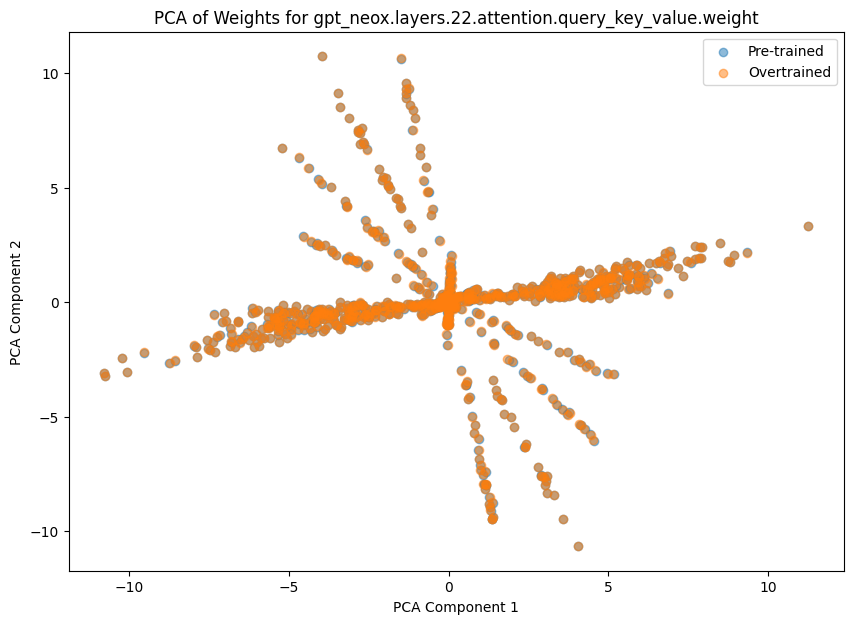

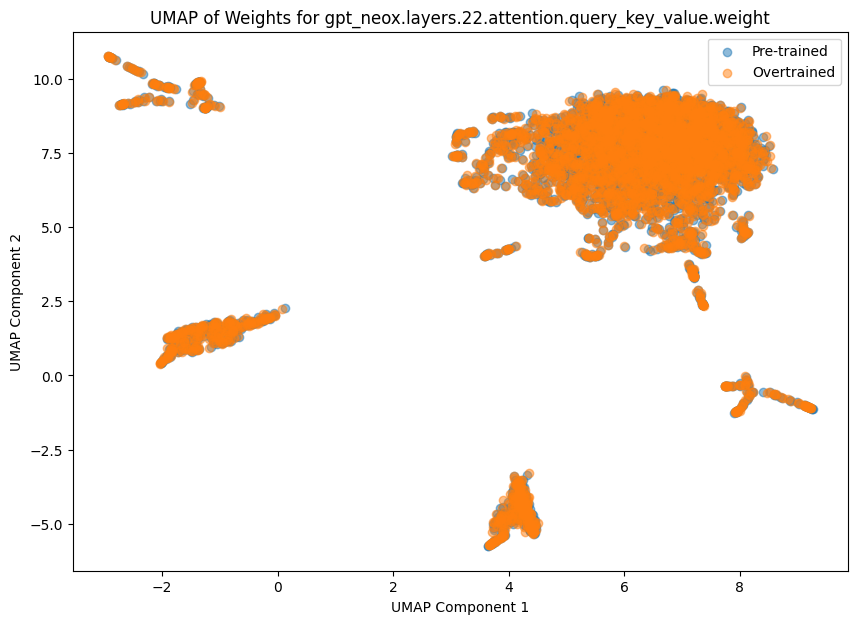

Performing PCA and UMAP on layer: gpt_neox.layers.23.attention.dense.weight


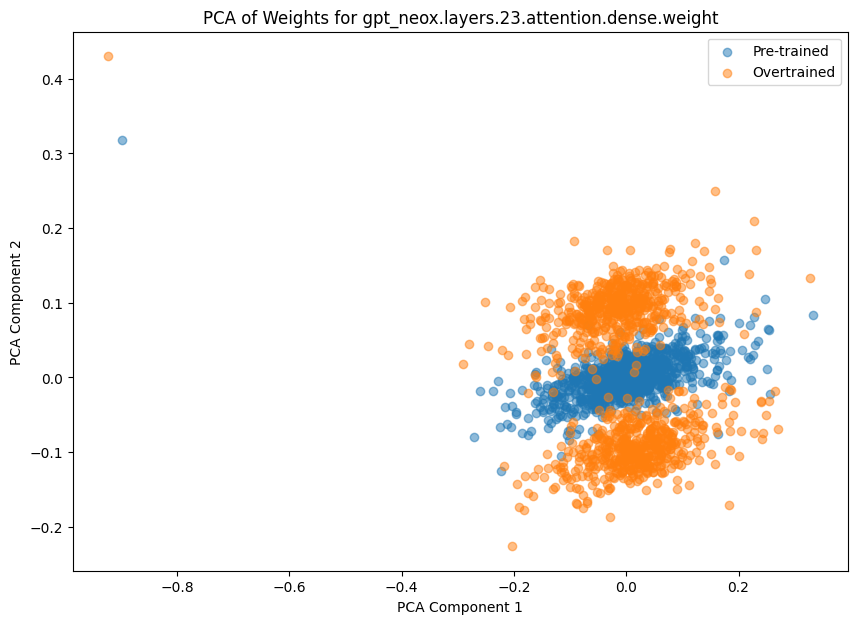

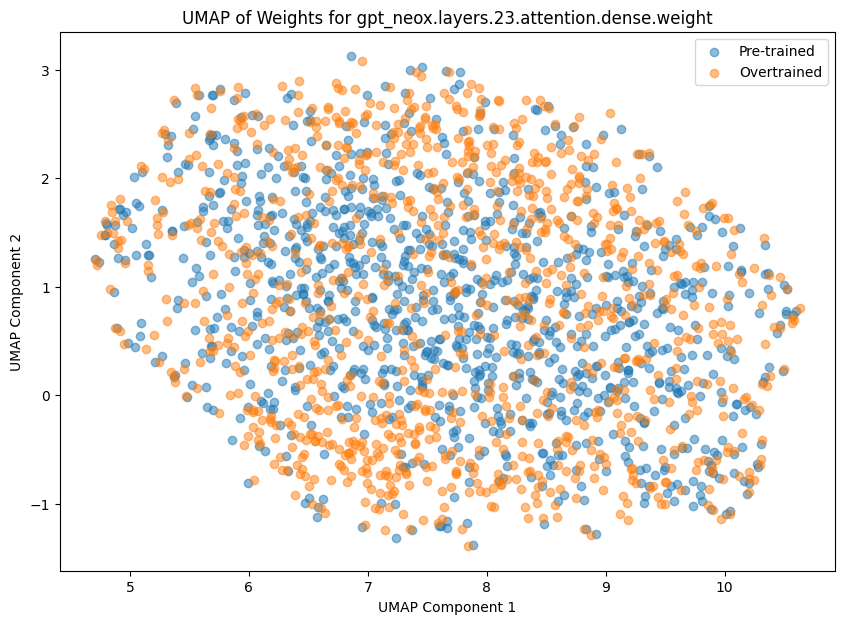

In [15]:
import os
import torch
import numpy as np
from transformers import GPTNeoXForCausalLM, AutoTokenizer
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import umap.umap_ as umap
import seaborn as sns

# Ensure tokenizer parallelism is disabled
os.environ["TOKENIZERS_PARALLELISM"] = "false"

# Function to perform PCA and plot the results
def plot_pca(weights1, weights2, title_suffix=""):
    pca = PCA(n_components=2)
    weights = np.concatenate([weights1, weights2], axis=0)
    pca_result = pca.fit_transform(weights)
    plt.figure(figsize=(10, 7))
    plt.scatter(pca_result[:weights1.shape[0], 0], pca_result[:weights1.shape[0], 1], alpha=0.5, label='Pre-trained')
    plt.scatter(pca_result[weights1.shape[0]:, 0], pca_result[weights1.shape[0]:, 1], alpha=0.5, label='Overtrained')
    plt.title(f'PCA of Weights {title_suffix}')
    plt.legend()
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.show()

# Function to perform UMAP and plot the results
def plot_umap(weights1, weights2, title_suffix=""):
    reducer = umap.UMAP()
    weights = np.concatenate([weights1, weights2], axis=0)
    scaled_weights = StandardScaler().fit_transform(weights)
    umap_result = reducer.fit_transform(scaled_weights)
    plt.figure(figsize=(10, 7))
    plt.scatter(umap_result[:weights1.shape[0], 0], umap_result[:weights1.shape[0], 1], alpha=0.5, label='Pre-trained')
    plt.scatter(umap_result[weights1.shape[0]:, 0], umap_result[weights1.shape[0]:, 1], alpha=0.5, label='Overtrained')
    plt.title(f'UMAP of Weights {title_suffix}')
    plt.legend()
    plt.xlabel('UMAP Component 1')
    plt.ylabel('UMAP Component 2')
    plt.show()

# Define the model and tokenizer
model_name = "EleutherAI/pythia-410m"
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Set the pad token to be the same as the eos token
if tokenizer.pad_token is None:
    tokenizer.pad_token = tokenizer.eos_token

# Load and inspect the pre-trained model
model_pretrained = GPTNeoXForCausalLM.from_pretrained(model_name).to('cuda')

# Load weights of the saved model
model_overtrained = GPTNeoXForCausalLM.from_pretrained(model_name).to('cuda')
saved_model_path = "/workspace/slice-monorepo/sub_validations/HT_LR_predictor_studier/50_100_high_learning/loop_25/pythia-410m_lr1e-06_epochs2.pth"
model_overtrained.load_state_dict(torch.load(saved_model_path))

# Print available layer names to find correct layers
available_layers = [name for name, _ in model_pretrained.named_parameters() if "weight" in name]
print("Available layers:", available_layers)

# Adjust layers to analyze
layer_names = [
    'gpt_neox.layers.0.attention.query_key_value.weight', 
    'gpt_neox.layers.0.attention.dense.weight', 
    'gpt_neox.layers.1.attention.query_key_value.weight', 
    'gpt_neox.layers.1.attention.dense.weight', 
    'gpt_neox.layers.11.attention.query_key_value.weight',  # Middle layer 1
    'gpt_neox.layers.11.attention.dense.weight',            # Middle layer 2
    'gpt_neox.layers.22.attention.query_key_value.weight',  # Second to last layer
    'gpt_neox.layers.23.attention.dense.weight'             # Last layer
]

# Perform PCA and UMAP for each layer
for layer_name in layer_names:
    if layer_name not in available_layers:
        print(f"Layer {layer_name} not found in model, skipping.")
        continue
    
    weights_pretrained = model_pretrained.state_dict()[layer_name].cpu().numpy().reshape(-1, model_pretrained.state_dict()[layer_name].shape[-1])
    weights_overtrained = model_overtrained.state_dict()[layer_name].cpu().numpy().reshape(-1, model_overtrained.state_dict()[layer_name].shape[-1])
    
    # Perform PCA and UMAP
    print(f"Performing PCA and UMAP on layer: {layer_name}")
    plot_pca(weights_pretrained, weights_overtrained, title_suffix=f"for {layer_name}")
    plot_umap(weights_pretrained, weights_overtrained, title_suffix=f"for {layer_name}")


In [20]:
import os
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from transformers import GPTNeoXForCausalLM, AutoTokenizer
from sklearn.decomposition import PCA

# Define output folder
output_folder = 'delete_me'
os.makedirs(output_folder, exist_ok=True)

# Ensure tokenizer parallelism is disabled
os.environ["TOKENIZERS_PARALLELISM"] = "false"

# Function to calculate MAD
def calculate_mad(weights1, weights2):
    return np.mean(np.abs(weights1 - weights2))

# Function to perform PCA and save the plot
def plot_pca(weights1, weights2, layer_name):
    try:
        if weights1.ndim < 2:
            weights1 = weights1.reshape(-1, 1)
            weights2 = weights2.reshape(-1, 1)
        pca = PCA(n_components=2)
        weights = np.concatenate([weights1, weights2], axis=0)
        pca_result = pca.fit_transform(weights)
        plt.figure(figsize=(10, 5))
        plt.scatter(pca_result[:len(weights1), 0], pca_result[:len(weights1), 1], alpha=0.5, label='Pre-trained')
        plt.scatter(pca_result[len(weights1):, 0], pca_result[len(weights1):, 1], alpha=0.5, label='Overtrained')
        plt.title(f'PCA of Weights: {layer_name}')
        plt.legend()
        plt.xlabel('PCA Component 1')
        plt.ylabel('PCA Component 2')
        plot_file = os.path.join(output_folder, f'{layer_name.replace(".", "_")}_pca.png')
        plt.savefig(plot_file)
        plt.close()
        #print(f"Saved PCA plot for {layer_name} at {plot_file}")
    except Exception as e:
        pass
        #print(f"Skipping PCA for {layer_name} due to error: {e}")

# Load models
def load_models():
    model_name = "EleutherAI/pythia-410m"
    model_pretrained = GPTNeoXForCausalLM.from_pretrained(model_name).to('cuda')
    model_overtrained = GPTNeoXForCausalLM.from_pretrained(model_name).to('cuda')
    saved_model_path = "/workspace/slice-monorepo/sub_validations/HT_LR_predictor_studier/50_100_high_learning_5epochs_models/25/pythia-410m_lr5.499999999999999e-06_epochs5.pth"
    model_overtrained.load_state_dict(torch.load(saved_model_path))
    return model_pretrained, model_overtrained

def main():
    model_pretrained, model_overtrained = load_models()
    layer_names = [name for name, _ in model_pretrained.named_parameters() if "weight" in name]

    mad_values = []
    layer_indices = []

    # Calculate MAD for all layers and perform PCA on selected layers
    for idx, layer_name in enumerate(layer_names):
        weights_pretrained = model_pretrained.state_dict()[layer_name].cpu().numpy()
        weights_overtrained = model_overtrained.state_dict()[layer_name].cpu().numpy()
        mad = calculate_mad(weights_pretrained.flatten(), weights_overtrained.flatten())
        mad_values.append({'Layer': layer_name, 'MAD': mad})
        layer_indices.append(idx)  # Collect index for plotting
        #print(f"MAD for {layer_name}: {mad}")

        # Perform PCA if it's in selected layers
        if layer_name in selected_layers:
            pass
            #plot_pca(weights_pretrained, weights_overtrained, layer_name)
    print("Finished PCA Plots")
    # Save MAD values to CSV
    df = pd.DataFrame(mad_values)
    csv_path = os.path.join(output_folder, 'mad_values.csv')
    df.to_csv(csv_path, index=False)
    print(f"MAD values saved to {csv_path}")

    # Plot and save the MAD scatter plot
    plt.figure(figsize=(18, 6))
    plt.scatter(layer_indices, df['MAD'], alpha=0.6)
    plt.xlabel('Layer Index')
    plt.ylabel('MAD')
    plt.title('MAD for Each Layer')
    plt.xticks(range(0, len(layer_names), 20))  # Adjusting x-ticks to show every 20th layer index
    plt.tight_layout()
    plot_path = os.path.join(output_folder, 'mad_plot.png')
    plt.savefig(plot_path)
    plt.close()
    print(f"MAD plot saved to {plot_path}")

if __name__ == "__main__":
    main()


Finished PCA Plots
MAD values saved to delete_me/mad_values.csv
MAD plot saved to delete_me/mad_plot.png
